In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 6.8 kB/s 
     |████████████████████████████████| 4.0 MB 39.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.


In [2]:
import torch
print(torch.__version__)

1.4.0


In [3]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
# !pip install fastai

In [4]:
from fastai.vision import get_transforms, ImageDataBunch, cnn_learner, ClassificationInterpretation, models 
from fastai.metrics import error_rate, accuracy

In [5]:
import fastai
fastai.__version__

'1.0.61'

In [6]:
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [7]:
data_directory = '/content/drive/MyDrive/DataScience/FastAI_LungClassification/dataset_split'

# dataset can be downloaded from https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af

In [ ]:
# @article{,
# title= {LC25000 Lung and colon histopathological image dataset},
# keywords= {},
# author= {Andrew A. Borkowski and Marilyn M. Bui and L. Brannon Thomas and Catherine P. Wilson and Lauren A. DeLand and Stephen M. Mastorides},
# abstract= {LC25000 LUNG AND COLON HISTOPATHOLOGICAL IMAGE DATASET

# The dataset contains color 25,000 images with 5 classes of 5,000 images each. All images are 768 x 768 pixels in size and are in jpeg file format. Our dataset can be downloaded as a 1.85 GB zip file LC25000.zip. After unzipping, the main folder lung_colon_image_set contains two subfolders: colon_image_sets and lung_image_sets.

# The subfolder colon_image_sets contains two secondary subfolders: colon_aca subfolder with 5000 images of colon adenocarcinomas and colon_n subfolder with 5000 images of benign colonic tissues.

# The subfolder lung_image_sets contains three secondary subfolders: lung_aca subfolder with 5000 images of lung adenocarcinomas, lung_scc subfolder with 5000 images of lung squamous cell carcinomas, and lung_n subfolder with 5000 images of benign lung tissues.

# ```
# File counts
# ./lung_image_sets/lung_aca :     5000
# ./lung_image_sets/lung_n :     5000
# ./lung_image_sets/lung_scc :     5000
# ./colon_image_sets/colon_n :     5000
# ./colon_image_sets/colon_aca :     5000
# ```


# https://i.imgur.com/aVdT3ks.jpeg

# https://i.imgur.com/TNhOxXJ.png

# },
# terms= {Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019},
# license= {},
# superseded= {},
# url= {https://github.com/tampapath/lung_colon_image_set/}
# }

In [8]:
data_augment = get_transforms(do_flip=True, max_rotate=10.0, )

In [9]:
image_data = ImageDataBunch.from_folder(data_directory, train='train', valid='val', ds_tfms=data_augment, size=224, bs=64, num_workers=8)

In [ ]:
# Show what the data looks like after being transformed
# image_data.show_batch()

In [10]:
# See the classes and count of classes in your dataset
print(image_data.classes,image_data.c)
print(len(image_data.train_ds), len(image_data.valid_ds))

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc'] 5
20000 2500


In [ ]:
# dir(models)

In [11]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(image_data, models.resnet34, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [12]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [13]:
# Unfreeze all layers of the CNN
learn.unfreeze()

In [ ]:
# learn.lr_find()

In [ ]:
# print(python.__version__)

In [ ]:
# learn.recorder.plot(suggestion = True)

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.089441,0.120738,0.966800,14:22
1,0.014020,0.002112,0.999600,11:27


In [15]:
# Save the trained fastai model using pretrained Resnet34
learn.save('/content/drive/MyDrive/DataScience/FastAI_LungClassification/models/model_resnet34_2epochs')

In [16]:
# Load the Model
learn.load('/content/drive/MyDrive/DataScience/FastAI_LungClassification/models/model_resnet34_2epochs')

Learner(data=ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
colon_aca,colon_aca,colon_aca,colon_aca,colon_aca
Path: /content/drive/MyDrive/DataScience/FastAI_LungClassification/dataset_split;

Valid: LabelList (2500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lung_scc,lung_scc,lung_scc,lung_scc,lung_scc
Path: /content/drive/MyDrive/DataScience/FastAI_LungClassification/dataset_split;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (c

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

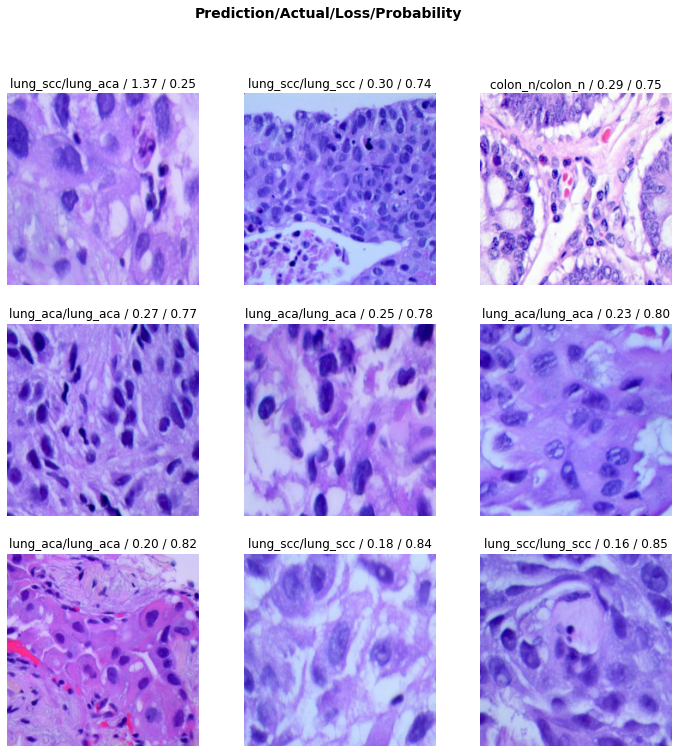

In [18]:
interp.plot_top_losses(9, figsize=(12,12), heatmap=False)

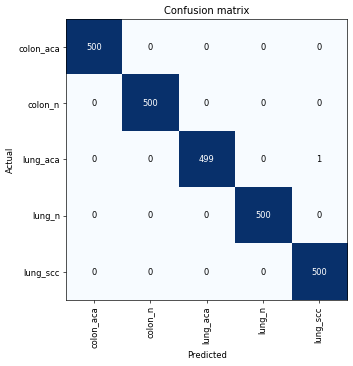

In [19]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[]